### RandomForest

In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [51]:
import warnings

warnings.filterwarnings('ignore')

In [57]:
data = pd.read_csv('Diabetes2021/diabetes_binary_5050split_health_indicators_BRFSS2021.csv')

In [60]:
from sklearn.preprocessing import StandardScaler

x_data = data.drop(columns=['Diabetes_binary'])
scaler = StandardScaler()

scaler.fit(x_data)

# Transform the entire DataFrame
x_data = pd.DataFrame(scaler.transform(x_data), columns=x_data.columns)

In [61]:
X = x_data
y = data['Diabetes_binary']

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7293


In [64]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train, y_train)

# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.7293


In [65]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [66]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

BMI                     0.160321
Age                     0.137560
Income                  0.104039
GenHlth                 0.099254
HighBP                  0.069456
PhysHlth                0.061218
MentHlth                0.058916
Education               0.054985
HighChol                0.040496
Smoker                  0.028756
Fruits                  0.028736
DiffWalk                0.027158
Sex                     0.025806
PhysActivity            0.022111
Veggies                 0.021282
HeartDiseaseorAttack    0.017714
HvyAlcoholConsump       0.010362
Stroke                  0.009971
NoDocbcCost             0.009669
CholCheck               0.006505
AnyHealthcare           0.005683
dtype: float64

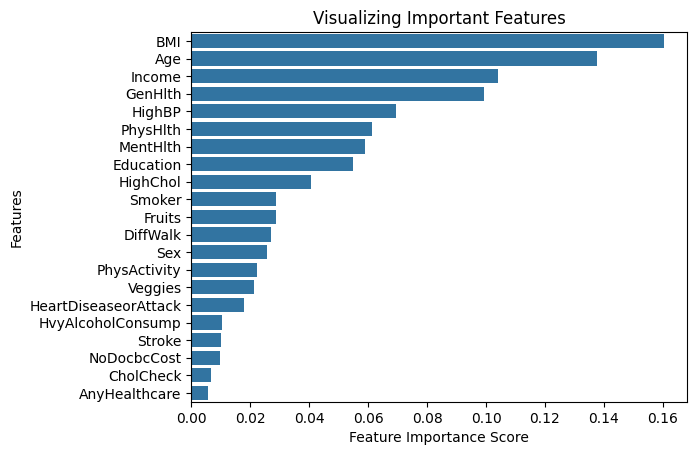

In [67]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

plt.title("Visualizing Important Features")
plt.show()

In [68]:
X = data.drop(columns=['Diabetes_binary', 'AnyHealthcare', 'CholCheck', 'NoDocbcCost', 'Stroke', 'HvyAlcoholConsump', 'HeartDiseaseorAttack', 'Veggies', 'PhysActivity', 'Sex', 'DiffWalk', 'Fruits', 'Smoker'], axis=1)
y = data['Diabetes_binary']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [70]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train, y_train)

# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.7063


In [71]:
feature_scores = pd.Series(rfc_100.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

BMI          0.215599
Age          0.168822
Income       0.140737
GenHlth      0.116634
PhysHlth     0.084294
HighBP       0.082308
MentHlth     0.081462
Education    0.072407
HighChol     0.037736
dtype: float64

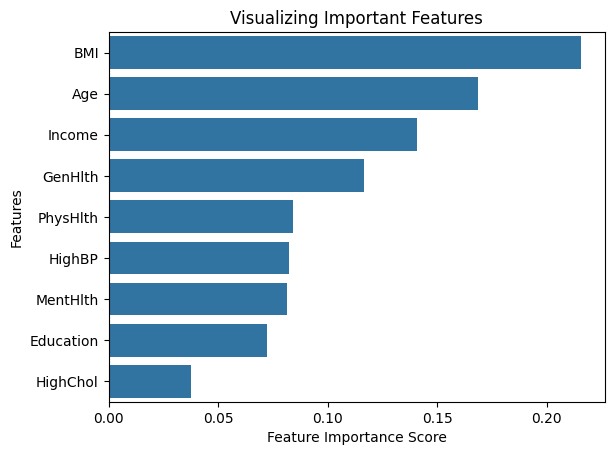

In [72]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

plt.title("Visualizing Important Features")
plt.show()

In [73]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_100)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[7469 3587]
 [2919 8180]]


In [74]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_100))

              precision    recall  f1-score   support

         0.0       0.72      0.68      0.70     11056
         1.0       0.70      0.74      0.72     11099

    accuracy                           0.71     22155
   macro avg       0.71      0.71      0.71     22155
weighted avg       0.71      0.71      0.71     22155



In [75]:
# start HERE

from sklearn.metrics import recall_score

rfc_rc = RandomForestClassifier(n_estimators=100, random_state=0)

rfc_rc.fit(X_train, y_train)


# Get predicted probabilities for positive class
y_pred_rc = rfc_rc.predict_proba(X_test)[:, 1]

# Set custom threshold (e.g., 0.4)
custom_threshold = 0.1
y_pred_thresh = (y_pred_rc >= custom_threshold).astype(int)

# Calculate recall score
recall_thresh = recall_score(y_test, y_pred_thresh)

print('Recall score with custom threshold {0:0.4f}'.format(recall_thresh))

# Tweak class weights
class_weights = {0: 1, 1: 2}  # Assuming 0 is majority class and 1 is minority class
rfc_weighted = RandomForestClassifier(n_estimators=100, random_state=0, class_weight=class_weights)
rfc_weighted.fit(X_train, y_train)
y_pred_weighted = rfc_weighted.predict(X_test)

recall_weighted = recall_score(y_test, y_pred_weighted)

print('Recall score with class weights {0:0.4f}'.format(recall_weighted))

Recall score with custom threshold 0.9649
Recall score with class weights 0.7375


In [76]:
feature_scores = pd.Series(rfc_100.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

BMI          0.215599
Age          0.168822
Income       0.140737
GenHlth      0.116634
PhysHlth     0.084294
HighBP       0.082308
MentHlth     0.081462
Education    0.072407
HighChol     0.037736
dtype: float64

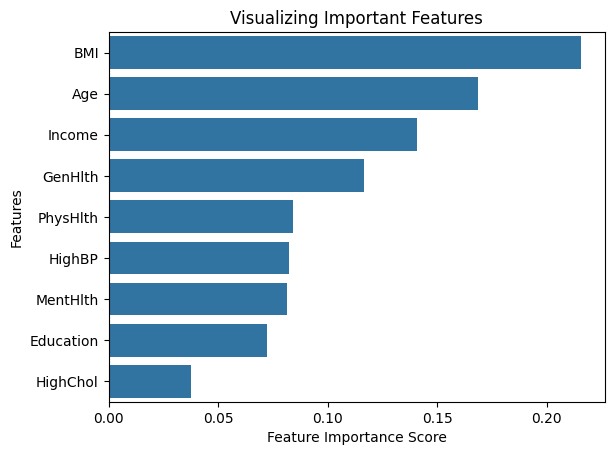

In [77]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

plt.title("Visualizing Important Features")
plt.show()

In [78]:
from sklearn.metrics import confusion_matrix, classification_report

# Ensure y_test and y_pred_trfc are integer types
y_test = y_test.astype(int)
y_pred_thresh = y_pred_thresh.astype(int)

# Print unique values of y_test and y_pred_trfc
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_pred_trfc:", np.unique(y_pred_thresh))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_thresh)
print('Confusion matrix:\n', cm)

report = classification_report(y_test, y_pred_thresh)
# Calculate classification report
print('Classification report:\n', report)

Unique values in y_test: [0 1]
Unique values in y_pred_trfc: [0 1]
Confusion matrix:
 [[ 3129  7927]
 [  390 10709]]
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.28      0.43     11056
           1       0.57      0.96      0.72     11099

    accuracy                           0.62     22155
   macro avg       0.73      0.62      0.57     22155
weighted avg       0.73      0.62      0.58     22155



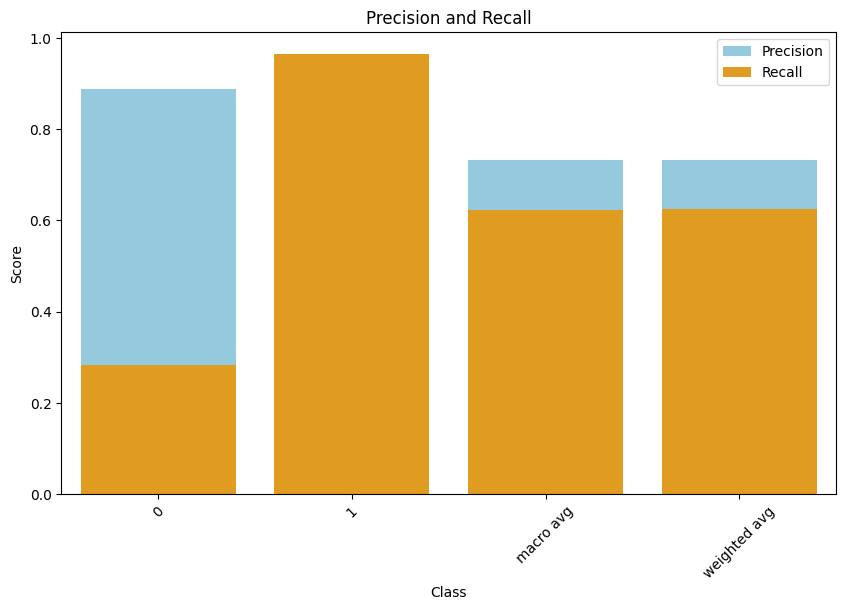

In [79]:
# Convert report_df to DataFrame for easier plotting
report_df = classification_report(y_test, y_pred_thresh, output_dict=True)


precision = [report_df[label]['precision'] for label in report_df.keys() if label != 'accuracy']
recall = [report_df[label]['recall'] for label in report_df.keys() if label != 'accuracy']
labels = [label for label in report_df.keys() if label != 'accuracy']

# Plot precision and recall
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=precision, color='skyblue', label='Precision')
sns.barplot(x=labels, y=recall, color='orange', label='Recall')

# Add legend and labels
plt.legend(loc='upper right')
plt.title('Precision and Recall')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

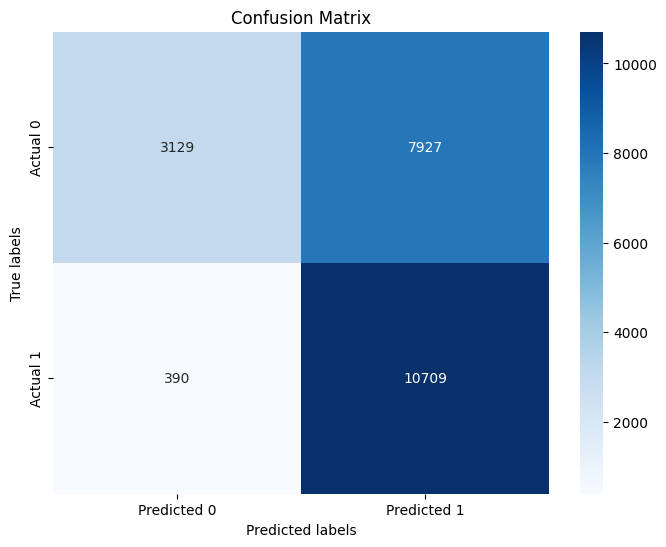

In [80]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels, title, and ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Predicted 0', 'Predicted 1'])
plt.yticks(ticks=[0.5, 1.5], labels=['Actual 0', 'Actual 1'])
plt.savefig('rf_cm.png')
plt.show()